In [188]:
import pandas as pd 
import numpy as np
data_0_4 = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_aged_0_4_years_total_number--by--geo--time.csv") 
data_5_9 = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_aged_5_9_years_total_number--by--geo--time.csv") 
data_10_14 = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_aged_10_14_years_total_number--by--geo--time.csv") 
data_15_19 = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_aged_15_19_years_total_number--by--geo--time.csv") 
data_20_39 = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_aged_20_39_years_total_number--by--geo--time.csv") 
data_40_59 = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_aged_40_59_years_total_number--by--geo--time.csv")
data_60plus= pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_aged_60plus_years_total_number--by--geo--time.csv") 


total_data_counts= pd.concat([data_0_4, data_5_9.iloc[:,2],data_10_14.iloc[:,2],data_15_19.iloc[:,2],data_20_39.iloc[:,2],data_40_59.iloc[:,2],data_60plus.iloc[:,2]], axis=1)
total_data_counts['total_sum'] = total_data_counts.sum(axis=1, numeric_only=True)

final_data_counts=total_data_counts.groupby(['time']).agg(
    {'time':'mean',
    'population_aged_0_4_years_total_number':'sum',
     'population_aged_5_9_years_total_number':'sum',
    'population_aged_10_14_years_total_number':'sum',
    'population_aged_15_19_years_total_number':'sum',
     'population_aged_20_39_years_total_number':'sum',
     'population_aged_40_59_years_total_number':'sum',
     'population_aged_60plus_years_total_number':'sum',
    'total_sum':'sum'})

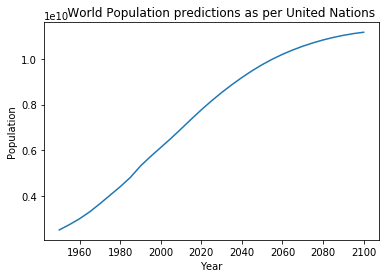

In [189]:
import matplotlib.pyplot as plt
year=final_data_counts['time']
population=final_data_counts['total_sum']

plt.plot(year,population)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("     World Population predictions as per United Nations")
#plt.yticks([0,2,4,6,8,10])
plt.show()

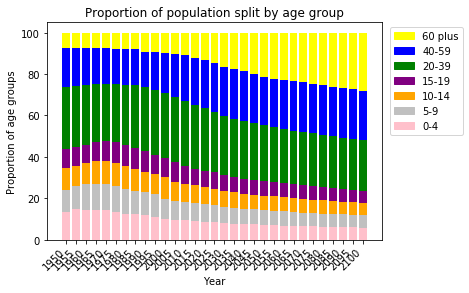

In [190]:
from matplotlib import patches
year=np.array(final_data_counts['time'])
population_age_0_4 =np.array(final_data_counts[ 'population_aged_0_4_years_total_number'])
population_age_5_9 = np.array(final_data_counts[ 'population_aged_5_9_years_total_number'])
population_age_10_14 = np.array(final_data_counts[ 'population_aged_10_14_years_total_number'])
population_age_15_19 = np.array(final_data_counts[ 'population_aged_15_19_years_total_number'])
population_age_20_39 = np.array(final_data_counts[ 'population_aged_20_39_years_total_number'])
population_age_40_59 = np.array(final_data_counts[ 'population_aged_40_59_years_total_number'])
population_age_60plus = np.array(final_data_counts[ 'population_aged_60plus_years_total_number'])
ind = [x for x, _ in enumerate(year)]

total = population_age_0_4 + population_age_5_9 + population_age_10_14+population_age_15_19+population_age_20_39+population_age_40_59+population_age_60plus

proportion_0_4 = np.true_divide(population_age_0_4, total) * 100
proportion_5_9 = np.true_divide(population_age_5_9, total) * 100
proportion_10_14 = np.true_divide(population_age_10_14 , total) * 100
proportion_15_19 = np.true_divide(population_age_15_19 , total) * 100
proportion_20_39 = np.true_divide(population_age_20_39, total) * 100
proportion_40_59 = np.true_divide(population_age_40_59, total) * 100
proportion_60plus = np.true_divide(population_age_60plus, total) * 100

plt.bar(ind, proportion_60plus, width=0.8, label='60 plus', color='yellow', bottom=proportion_0_4+proportion_5_9+proportion_10_14+proportion_15_19+proportion_20_39+proportion_40_59)
plt.bar(ind, proportion_40_59, width=0.8, label='40-59', color='blue', bottom=proportion_0_4+proportion_5_9+proportion_10_14+proportion_15_19+proportion_20_39)
plt.bar(ind, proportion_20_39, width=0.8, label='20-39', color='green', bottom=proportion_0_4+proportion_5_9+proportion_10_14+proportion_15_19)
plt.bar(ind, proportion_15_19, width=0.8, label='15-19', color='purple', bottom=proportion_0_4+proportion_5_9+proportion_10_14)
plt.bar(ind, proportion_10_14, width=0.8, label='10-14', color='orange', bottom=proportion_0_4+proportion_5_9)
plt.bar(ind, proportion_5_9, width=0.8, label='5-9', color='silver', bottom=proportion_0_4)
plt.bar(ind, proportion_0_4, width=0.8, label='0-4', color='pink')

y= patches.Patch(color='yellow', label='60 plus')
b= patches.Patch(color='blue', label='40-59')
g= patches.Patch(color='green', label='20-39')
p= patches.Patch(color='purple', label='15-19')
o= patches.Patch(color='orange', label='10-14')
s= patches.Patch(color='silver', label='5-9')
pi= patches.Patch(color='pink', label='0-4')

plt.xticks(ind, year)
plt.ylabel("Proportion of age groups")
plt.xlabel("Year")
plt.title("Proportion of population split by age group")
plt.ylim=1.0
plt.legend(handles=[y,b,g,p,o,s,pi],bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [191]:
#pd.options.mode.chained_assignment = None
gdp = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
country = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv")
combined = pd.merge(gdp,country, how='inner',left_on='geo', right_on='country')
cleaned_data=combined[['geo','time','income_per_person_gdppercapita_ppp_inflation_adjusted','name','world_4region']]

Text(0, 0.5, 'Income/Person')

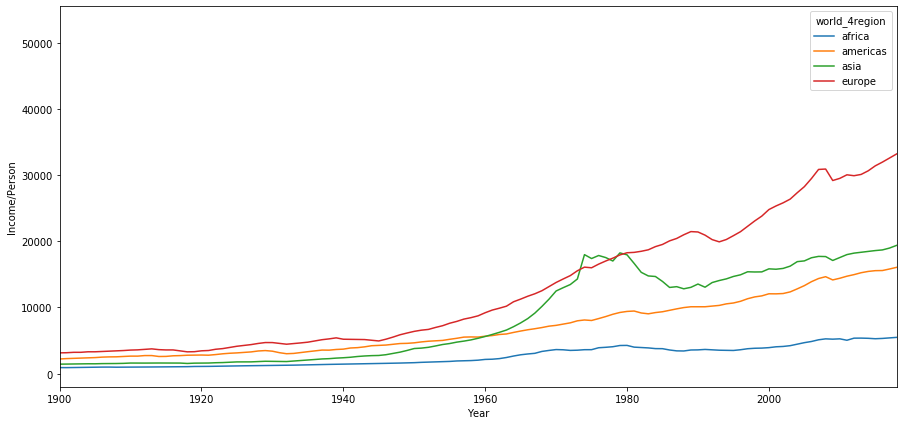

In [192]:
fig, ax = plt.subplots(figsize=(15,7))
cleaned_data.groupby(['time','world_4region']).mean()[ 'income_per_person_gdppercapita_ppp_inflation_adjusted'].unstack().plot(ax=ax)
ax.set_xlim(1900, 2018)
plt.xlabel("Year")
plt.ylabel("Income/Person")

Text(0, 0.5, 'Income/Person')

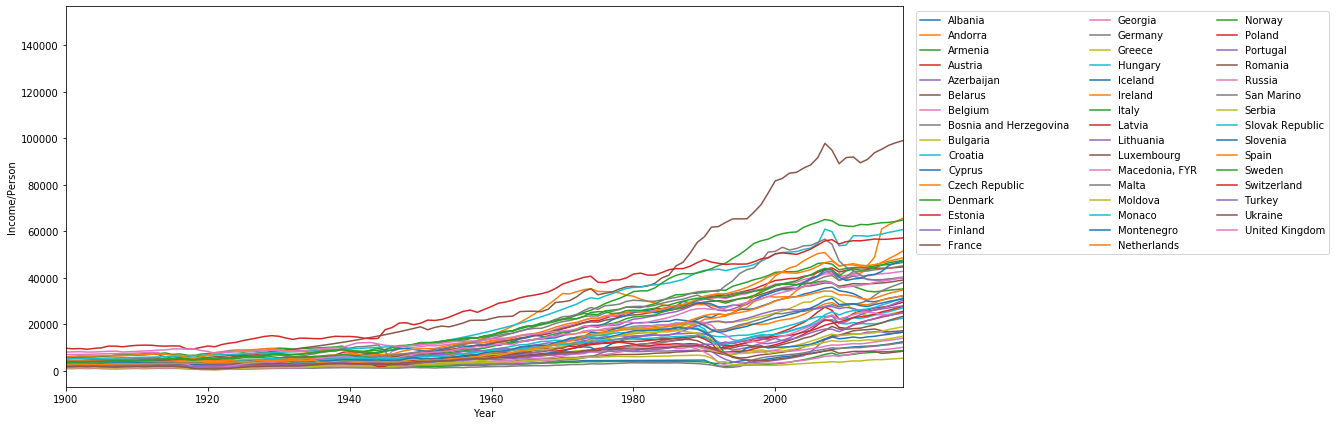

In [193]:
fig, ax = plt.subplots(figsize=(15,7))
cleaned_data.loc[cleaned_data['world_4region'] == 'europe'].groupby(['time','name']).mean()[ 'income_per_person_gdppercapita_ppp_inflation_adjusted'].unstack().plot(ax=ax)
plt.legend(ncol=3,bbox_to_anchor=(1.01, 1), loc='upper left')
ax.set_xlim(1900, 2018)
plt.xlabel("Year")
plt.ylabel("Income/Person")

Text(0, 0.5, 'Income/Person')

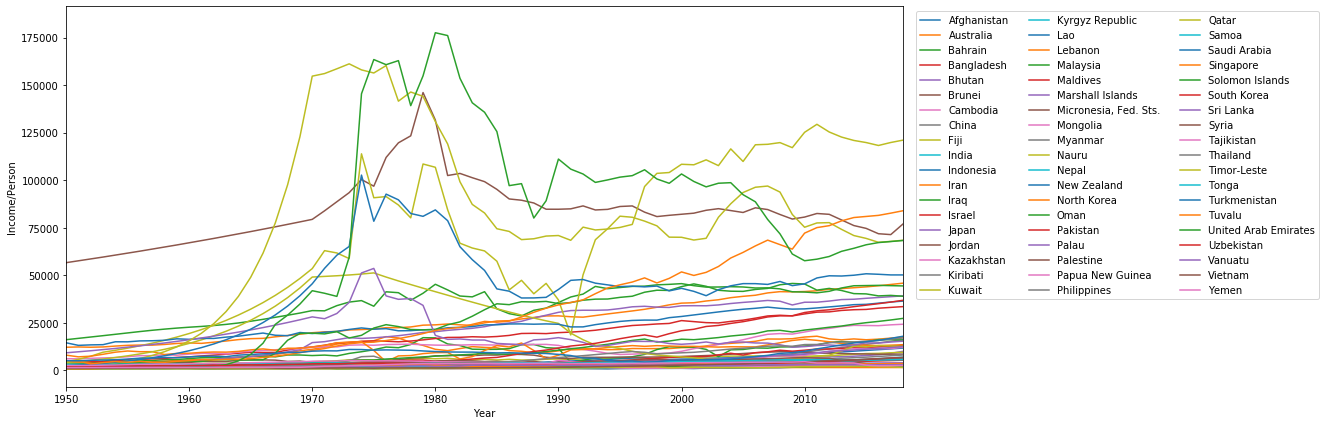

In [194]:
fig, ax = plt.subplots(figsize=(15,7))
cleaned_data.loc[cleaned_data['world_4region'] == 'asia'].groupby(['time','name']).mean()[ 'income_per_person_gdppercapita_ppp_inflation_adjusted'].unstack().plot(ax=ax)
plt.legend(ncol=3,bbox_to_anchor=(1.01, 1), loc='upper left')
ax.set_xlim(1950, 2018)
plt.xlabel("Year")
plt.ylabel("Income/Person")

Text(0, 0.5, 'Income/Person')

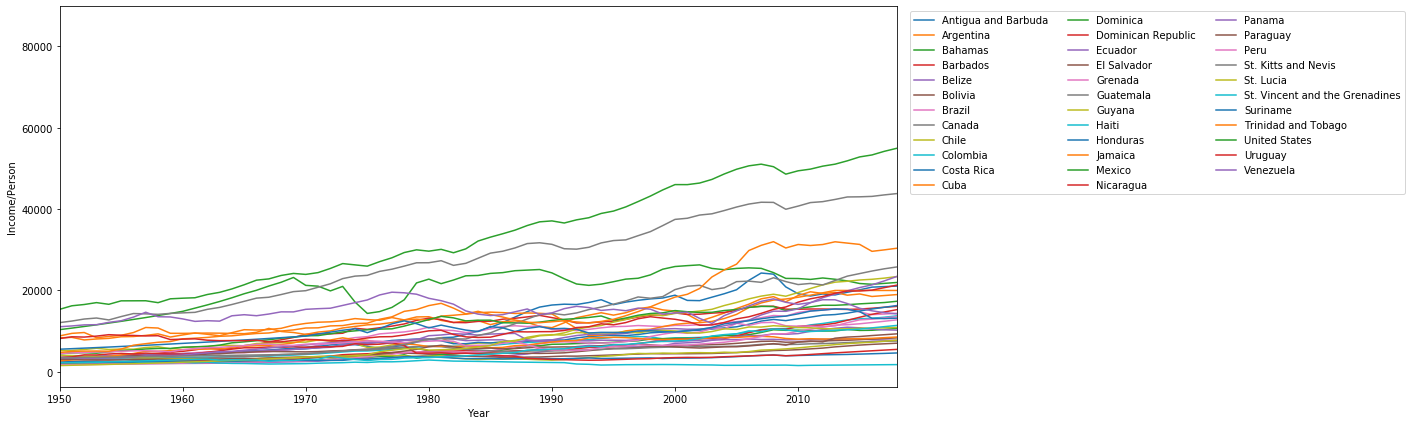

In [195]:
fig, ax = plt.subplots(figsize=(15,7))
cleaned_data.loc[cleaned_data['world_4region'] == 'americas'].groupby(['time','name']).mean()[ 'income_per_person_gdppercapita_ppp_inflation_adjusted'].unstack().plot(ax=ax)
plt.legend(ncol=3,bbox_to_anchor=(1.01, 1), loc='upper left',)
ax.set_xlim(1950, 2018)
plt.xlabel("Year")
plt.ylabel("Income/Person")

Text(0, 0.5, 'Income/Person')

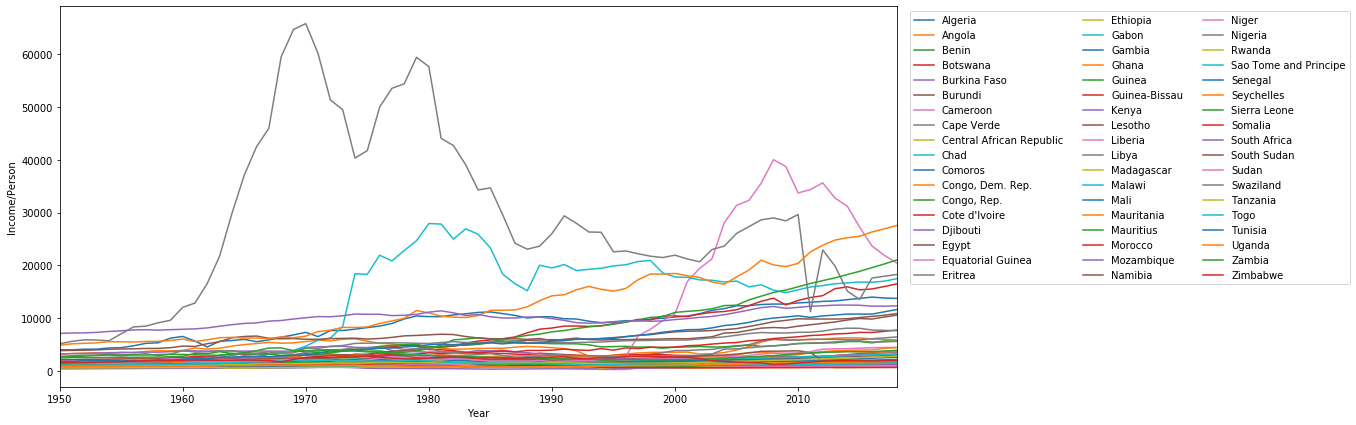

In [196]:
fig, ax = plt.subplots(figsize=(15,7))
cleaned_data.loc[cleaned_data['world_4region'] == 'africa'].groupby(['time','name']).mean()[ 'income_per_person_gdppercapita_ppp_inflation_adjusted'].unstack().plot(ax=ax)
plt.legend(ncol=3,bbox_to_anchor=(1.01, 1), loc='upper left',)
ax.set_xlim(1950, 2018)
plt.xlabel("Year")
plt.ylabel("Income/Person")

In [197]:
lifeexpectancy = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
combined = pd.merge(cleaned_data,lifeexpectancy, how='inner',left_on=['geo','time'], right_on=['geo','time'])
cleaned_data_le=combined[['geo','time','income_per_person_gdppercapita_ppp_inflation_adjusted','name','world_4region','life_expectancy_years']]
child_deaths = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--number_of_child_deaths--by--geo--time.csv")
combined = pd.merge(cleaned_data_le,child_deaths, how='inner',left_on=['geo','time'], right_on=['geo','time'])
cleaned_data_final=combined[['geo','time','income_per_person_gdppercapita_ppp_inflation_adjusted','name','world_4region','life_expectancy_years','number_of_child_deaths']]

Text(0, 0.5, 'Income/Person')

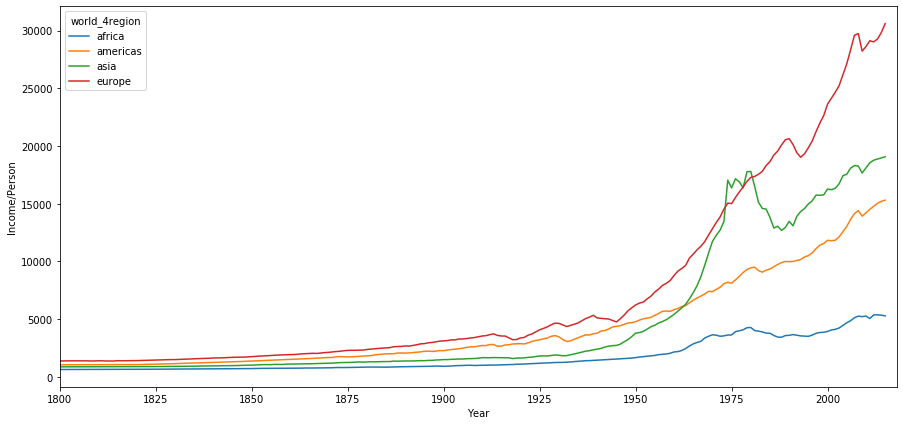

In [198]:
fig, ax = plt.subplots(figsize=(15,7))
cleaned_data_final.groupby(['time','world_4region']).mean()[ 'income_per_person_gdppercapita_ppp_inflation_adjusted'].unstack().plot(ax=ax)
ax.set_xlim(1800, 2018)
plt.xlabel("Year")
plt.ylabel("Income/Person")

Text(0, 0.5, 'Life Expectancy')

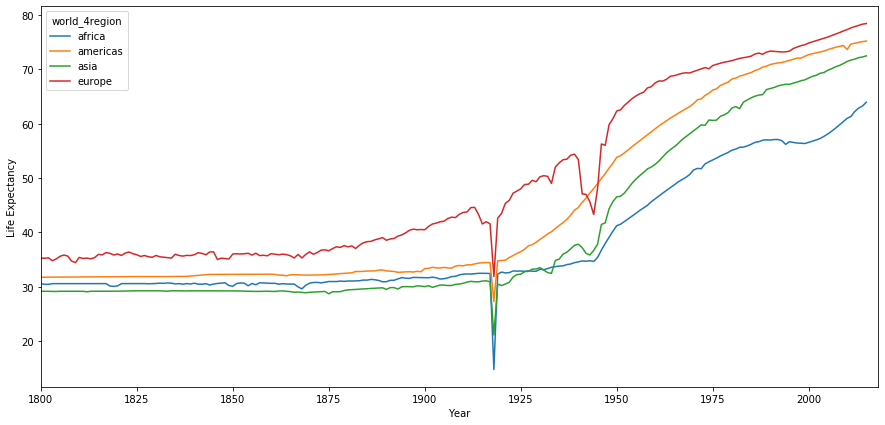

In [199]:
fig, ax = plt.subplots(figsize=(15,7))
cleaned_data_final.groupby(['time','world_4region']).mean()['life_expectancy_years'].unstack().plot(ax=ax)
ax.set_xlim(1800, 2018)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

Text(0, 0.5, 'Child deaths')

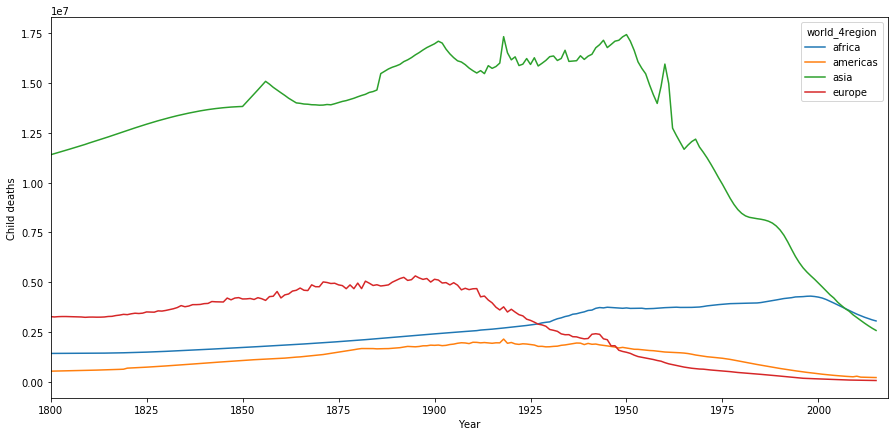

In [200]:
fig, ax = plt.subplots(figsize=(15,7))
cleaned_data_final.groupby(['time','world_4region']).sum()['number_of_child_deaths'].unstack().plot(ax=ax)
ax.set_xlim(1800, 2018)
plt.xlabel("Year")
plt.ylabel("Child deaths")

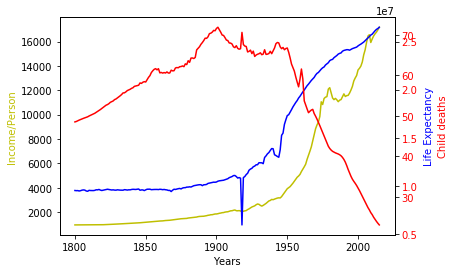

In [201]:
final_data_counts=cleaned_data_final.groupby(['time']).agg(
    {'time':'mean',
   'income_per_person_gdppercapita_ppp_inflation_adjusted':'mean',
    'life_expectancy_years':'mean',
    'number_of_child_deaths':'sum'})

time =np.array(final_data_counts['time'])
income_per_person_with_projections = np.array(final_data_counts['income_per_person_gdppercapita_ppp_inflation_adjusted'])
life_expectancy_years =np.array(final_data_counts['life_expectancy_years'])
number_of_child_deaths =np.array(final_data_counts['number_of_child_deaths'])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time,income_per_person_with_projections, 'y-' )
ax1.set_ylabel('Income/Person',color='y')
ax1.set_xlabel('Years')

ax2 = ax1.twinx()
ax2.plot(time, life_expectancy_years, 'b-')
ax2.set_ylabel('Life Expectancy', color='b',labelpad=10)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
ax3 = ax1.twinx()
ax3.plot(time, number_of_child_deaths, 'r-')
ax3.set_ylabel('Child deaths', color='r',labelpad=20)
for tl in ax3.get_yticklabels():
    tl.set_color('r')

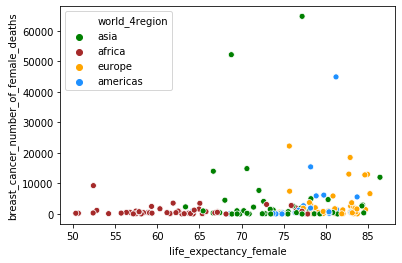

In [202]:
rng = np.random.RandomState(0)
lifeexpectancy_female = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_female--by--geo--time.csv")
lifeexpectancy_female=lifeexpectancy_female.loc[lifeexpectancy_female ['time'] == 2012]
breastcancer_female = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--breast_cancer_number_of_female_deaths--by--geo--time.csv")
breastcancer_female=breastcancer_female.loc[breastcancer_female ['time'] == 2012]
combined = pd.merge(breastcancer_female,lifeexpectancy_female, how='inner',left_on=['geo'], right_on=['geo'])
country = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv")
combined=pd.merge(combined,country, how='inner',left_on=['geo'], right_on=['country'])
color_dict = dict({'africa':'brown',
                  'asia':'green',
                  'europe': 'orange',
                   'americas': 'dodgerblue'})

g = sns.scatterplot(x='life_expectancy_female', y='breast_cancer_number_of_female_deaths', hue='world_4region',data=combined, palette=color_dict, 
                   legend='full')

In [203]:
combined[combined['world_4region'] == 'europe'].sort_values(by=['breast_cancer_number_of_female_deaths'],ascending=False)

,geo,time_x,breast_cancer_number_of_female_deaths,time_y,life_expectancy_female,country,alt_5,alternative_1,alternative_2,alternative_3,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
141,rus,2012,22256.81,2012,75.664,rus,NaN,Russian Federation,Russian Federation,NaN,...,60.00000,100.00000,christian,Russia,RUSSIA FEDERATION,True,RU,RUSSIAN FEDERATION,europe,europe_central_asia
43,deu,2012,18516.67,2012,82.877,deu,NaN,NaN,NaN,NaN,...,51.50000,10.50000,christian,Germany,GERMANY,True,DE,GERMANY,europe,europe_central_asia
59,gbr,2012,13067.17,2012,82.722,gbr,NaN,UK,United Kingdom of Great Britain and Northern I...,U.K. of Great Britain and Northern Ireland,...,54.75844,-2.69531,christian,United Kingdom,UNITED KINGDOM,True,GB,UNITED KINGDOM,europe,europe_central_asia
56,fra,2012,13003.34,2012,84.936,fra,NaN,NaN,NaN,NaN,...,46.00000,2.00000,christian,France,FRANCE,True,FR,FRANCE,europe,europe_central_asia
82,ita,2012,12810.07,2012,84.621,ita,NaN,NaN,NaN,NaN,...,42.83333,12.83333,christian,Italy,ITALY,True,IT,ITALY,europe,europe_central_asia
173,ukr,2012,7477.16,2012,75.697,ukr,NaN,NaN,NaN,NaN,...,49.00000,32.00000,christian,Ukraine,UKRAINE,True,UA,UKRAINE,europe,europe_central_asia
51,esp,2012,6672.06,2012,85.226,esp,NaN,NaN,NaN,NaN,...,40.00000,-4.00000,christian,Spain,SPAIN,True,ES,SPAIN,europe,europe_central_asia
133,pol,2012,5911.18,2012,80.844,pol,NaN,NaN,NaN,NaN,...,52.00000,20.00000,christian,Poland,POLAND,True,PL,POLAND,europe,europe_central_asia
170,tur,2012,3750.48,2012,78.047,tur,NaN,NaN,NaN,NaN,...,39.00000,35.00000,muslim,Turkey,TURKEY,True,TR,TURKEY,europe,europe_central_asia
123,nld,2012,3689.76,2012,83.061,nld,NaN,The Netherlands,NaN,NaN,...,52.25000,5.75000,christian,Netherlands,NETHERLANDS,True,NL,NETHERLANDS,europe,europe_central_asia


In [204]:
combined[combined['world_4region'] == 'asia'].sort_values(by=['breast_cancer_number_of_female_deaths'],ascending=False)

,geo,time_x,breast_cancer_number_of_female_deaths,time_y,life_expectancy_female,country,alt_5,alternative_1,alternative_2,alternative_3,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
31,chn,2012,64720.46,2012,77.180,chn,NaN,China (Mainland),"China, mainland",NaN,...,35.00000,105.00000,eastern_religions,China,CHINA,True,CN,CHINA,asia,east_asia_pacific
76,ind,2012,52163.73,2012,68.783,ind,NaN,NaN,NaN,NaN,...,22.00000,79.00000,eastern_religions,India,INDIA,True,IN,INDIA,asia,south_asia
75,idn,2012,14871.79,2012,70.635,idn,NaN,NaN,NaN,NaN,...,-5.00000,120.00000,muslim,Indonesia,INDONESIA,True,ID,INDONESIA,asia,east_asia_pacific
128,pak,2012,14013.48,2012,66.649,pak,NaN,NaN,NaN,NaN,...,30.00000,70.00000,muslim,Pakistan,PAKISTAN,True,PK,PAKISTAN,asia,south_asia
85,jpn,2012,12036.72,2012,86.416,jpn,JAPAN (EXCLUDING THE RUYUKU ISLANDS),NaN,NaN,NaN,...,35.68536,139.75309,eastern_religions,Japan,JAPAN,True,JP,JAPAN,asia,east_asia_pacific
131,phl,2012,7730.86,2012,72.060,phl,NaN,NaN,NaN,NaN,...,13.00000,122.00000,christian,Philippines,PHILIPPINES,True,PH,PHILIPPINES,asia,east_asia_pacific
163,tha,2012,5019.08,2012,78.226,tha,NaN,NaN,NaN,NaN,...,15.50000,101.00000,eastern_religions,Thailand,THAILAND,True,TH,THAILAND,asia,east_asia_pacific
179,vnm,2012,4736.62,2012,80.263,vnm,NaN,Viet Nam,NaN,NaN,...,16.16667,107.83333,eastern_religions,Vietnam,VIETNAM,True,VN,VIET NAM,asia,east_asia_pacific
111,mmr,2012,4526.16,2012,68.020,mmr,Myanmar [Burma],Burma,Myanmar/Burma,MYANMAR (FORMERLY BURMA),...,21.00000,96.00000,eastern_religions,Myanmar,NaN,True,MM,MYANMAR,asia,east_asia_pacific
14,bgd,2012,4136.17,2012,72.617,bgd,NaN,NaN,NaN,NaN,...,24.00000,90.00000,muslim,Bangladesh,NaN,True,BD,BANGLADESH,asia,south_asia


In [205]:
combined[combined['world_4region'] == 'americas'].sort_values(by=['breast_cancer_number_of_female_deaths'],ascending=False)

,geo,time_x,breast_cancer_number_of_female_deaths,time_y,life_expectancy_female,country,alt_5,alternative_1,alternative_2,alternative_3,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
175,usa,2012,44895.56,2012,81.201,usa,U.S.,United States of America,USA,U.S.A.,...,39.76000,-98.50000,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
22,bra,2012,15436.90,2012,78.193,bra,NaN,NaN,NaN,NaN,...,-10.00000,-55.00000,christian,Brazil,BRAZIL,True,BR,BRAZIL,americas,america
4,arg,2012,6193.63,2012,79.752,arg,NaN,NaN,NaN,NaN,...,-34.00000,-64.00000,christian,Argentina,ARGENTINA,True,AR,ARGENTINA,americas,america
107,mex,2012,5937.94,2012,78.849,mex,NaN,NaN,NaN,NaN,...,19.42847,-99.12766,christian,Mexico,MEXICO,True,MX,MEXICO,americas,america
28,can,2012,5595.64,2012,83.704,can,NaN,NaN,NaN,NaN,...,60.10867,-113.64258,christian,Canada,CANADA,True,CA,CANADA,americas,america
36,col,2012,2699.04,2012,77.336,col,NaN,NaN,NaN,NaN,...,4.00000,-73.25000,christian,Colombia,COLOMBIA,True,CO,COLOMBIA,americas,america
178,ven,2012,1952.32,2012,78.179,ven,NaN,"Venezuela, RB",Venezuela (Bolivarian Republic of),Venezuela (Bolivarian Republic of,...,8.00000,-66.00000,christian,Venezuela,VENEZUELA,True,VE,VENEZUELA,americas,america
40,cub,2012,1467.34,2012,81.279,cub,NaN,NaN,NaN,NaN,...,22.00000,-79.50000,christian,Cuba,NaN,True,CU,CUBA,americas,america
30,chl,2012,1413.86,2012,81.275,chl,NaN,NaN,NaN,NaN,...,-33.45694,-70.64827,christian,Chile,CHILE,True,CL,CHILE,americas,america
130,per,2012,1248.76,2012,76.779,per,NaN,NaN,NaN,NaN,...,-10.00000,-75.25000,christian,Peru,PERU,True,PE,PERU,americas,america


In [206]:
combined[combined['world_4region'] == 'africa'].sort_values(by=['breast_cancer_number_of_female_deaths'],ascending=False)

,geo,time_x,breast_cancer_number_of_female_deaths,time_y,life_expectancy_female,country,alt_5,alternative_1,alternative_2,alternative_3,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
121,nga,2012,9295.31,2012,52.426,nga,NaN,NaN,NaN,NaN,...,10.00000,8.00000,NaN,Nigeria,NIGERIA,True,NG,NIGERIA,africa,sub_saharan_africa
183,zaf,2012,3569.40,2012,61.884,zaf,NaN,South Africa Republic,NaN,NaN,...,-29.00000,24.00000,christian,South Africa,SOUTH AFRICA,True,ZA,SOUTH AFRICA,africa,sub_saharan_africa
53,eth,2012,3499.49,2012,65.051,eth,NaN,NaN,NaN,NaN,...,9.00000,39.50000,christian,Ethiopia,ETHIOPIA,True,ET,ETHIOPIA,africa,sub_saharan_africa
49,egy,2012,3128.47,2012,72.967,egy,NaN,"Egypt, Arab Rep.",NaN,NaN,...,27.00000,30.00000,muslim,Egypt,EGYPT,True,EG,EGYPT,africa,middle_east_north_africa
103,mar,2012,2805.06,2012,75.893,mar,NaN,NaN,NaN,NaN,...,32.00000,-6.00000,muslim,Morocco,MOROCCO,True,MA,MOROCCO,africa,middle_east_north_africa
34,cod,2012,2494.45,2012,59.325,cod,Democratic Republic Of The Congo,Congo (Democratic Republic of the),Congo Dem Rep,Democratic Republic of Congo,...,-2.50000,23.50000,christian,"Congo, Dem. Rep.","CONGO, DEM REP",True,CD,"CONGO, Democratic Republic of (was Zaire)",africa,sub_saharan_africa
47,dza,2012,2057.56,2012,76.412,dza,NaN,NaN,NaN,NaN,...,28.00000,3.00000,muslim,Algeria,ALGERIA,True,DZ,ALGERIA,africa,middle_east_north_africa
172,uga,2012,1725.94,2012,60.319,uga,NaN,NaN,NaN,NaN,...,1.25000,32.50000,christian,Uganda,UGANDA,True,UG,UGANDA,africa,sub_saharan_africa
144,sdn,2012,1637.55,2012,64.954,sdn,REPUBLIC OF SUDAN,NaN,NaN,NaN,...,16.00000,30.00000,muslim,Sudan,SUDAN,True,SD,SUDAN,africa,sub_saharan_africa
171,tza,2012,1283.04,2012,64.386,tza,NaN,"Tanzania, U. Rep. of",Tanzania (United Republic of),United Republic of Tanzania,...,-6.00000,35.00000,christian,Tanzania,TANZANIA,True,TZ,"TANZANIA, UNITED REPUBLIC OF",africa,sub_saharan_africa


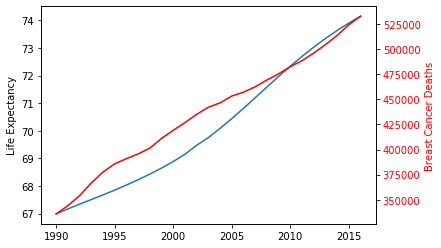

In [207]:
lifeexpectancy_female = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_female--by--geo--time.csv")
breastcancer_female = pd.read_csv("C:/Users/manvi/OneDrive/Documents/Information Visualisation/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--breast_cancer_number_of_female_deaths--by--geo--time.csv")
combined = pd.merge(lifeexpectancy_female,breastcancer_female, how='inner',left_on=['geo','time'], right_on=['geo','time'])
final_data_counts=combined.groupby(['time']).agg(
    {'time':'mean',
   'life_expectancy_female':'mean',
   'breast_cancer_number_of_female_deaths':'sum'})

time =np.array(final_data_counts['time'])
life_expectancy_female = np.array(final_data_counts['life_expectancy_female'])
breast_cancer_number_of_new_female_cases =np.array(final_data_counts['breast_cancer_number_of_female_deaths'])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time,life_expectancy_female )
ax1.set_ylabel('Life Expectancy')

ax2 = ax1.twinx()
ax2.plot(time,breast_cancer_number_of_new_female_cases, 'r-')
ax2.set_ylabel('Breast Cancer Deaths', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')